## Figure 5: Optimisation results

### Load required libraries

In [1]:
from sys import argv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy
import scipy.io as spio
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
import gaussianprocess as gp
from fitderiv import fitderiv
import genutils as gu
import datetime
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import math
import os 
from os.path import dirname, join as pjoin
sns.set(style="ticks")

### Load data

In [2]:
pwd

'/Users/lucia/Dropbox/Processes_V2.0_Images/Python_Scripts'

In [2]:
# Bayesian
Exp_Data_NoOpt_In= pd.read_csv('/Users/lucia/Dropbox/Plots/PythonImagesFOSBE2019/Exper/Optim2Steps_Inputs.csv', delimiter=",")

Pred_NoOpt_GFP= pd.read_csv('/Users/lucia/Dropbox/Plots/PythonImagesFOSBE2019/Exper/Model4_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_GFP.csv', delimiter=",")
Pred_NoOpt_RFP= pd.read_csv('/Users/lucia/Dropbox/Plots/PythonImagesFOSBE2019/Exper/Model4_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_RFP.csv', delimiter=",")

PredM2_NoOpt_GFP= pd.read_csv('/Users/lucia/Dropbox/Plots/PythonImagesFOSBE2019/Exper/Model2_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_GFP.csv', delimiter=",")
PredM2_NoOpt_RFP= pd.read_csv('/Users/lucia/Dropbox/Plots/PythonImagesFOSBE2019/Exper/Model2_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_RFP.csv', delimiter=",")

# Frequentist
Freq_Output= pd.read_csv('/Users/lucia/Dropbox/Processes_V2.0_Images/OptimisationResults/F_M1vsM3/MultOED_Freq.csv')
Freq_Input = pd.read_csv('/Users/lucia/Dropbox/Processes_V2.0_Images/OptimisationResults/F_M1vsM3/MultOED_Freq_Input.csv' )
print(Freq_Input)


   timeSwitch      IPTG        aTc
0           0  0.284425  40.136410
1         180  0.514462  21.724146
2         360  0.367859  22.423785
3         540  0.368693  22.724962
4         720  0.366853  22.786141
5         900  0.366078  22.786155
6        1080  0.354204  22.786155
7        1260  0.389180  22.786156


#### Plot

In [3]:
print(Freq_Output['time'])

0        0.000000
1       14.545455
2       29.090909
3       43.636364
4       58.181818
         ...     
95    1381.818182
96    1396.363636
97    1410.909091
98    1425.454545
99    1440.000000
Name: time, Length: 100, dtype: float64


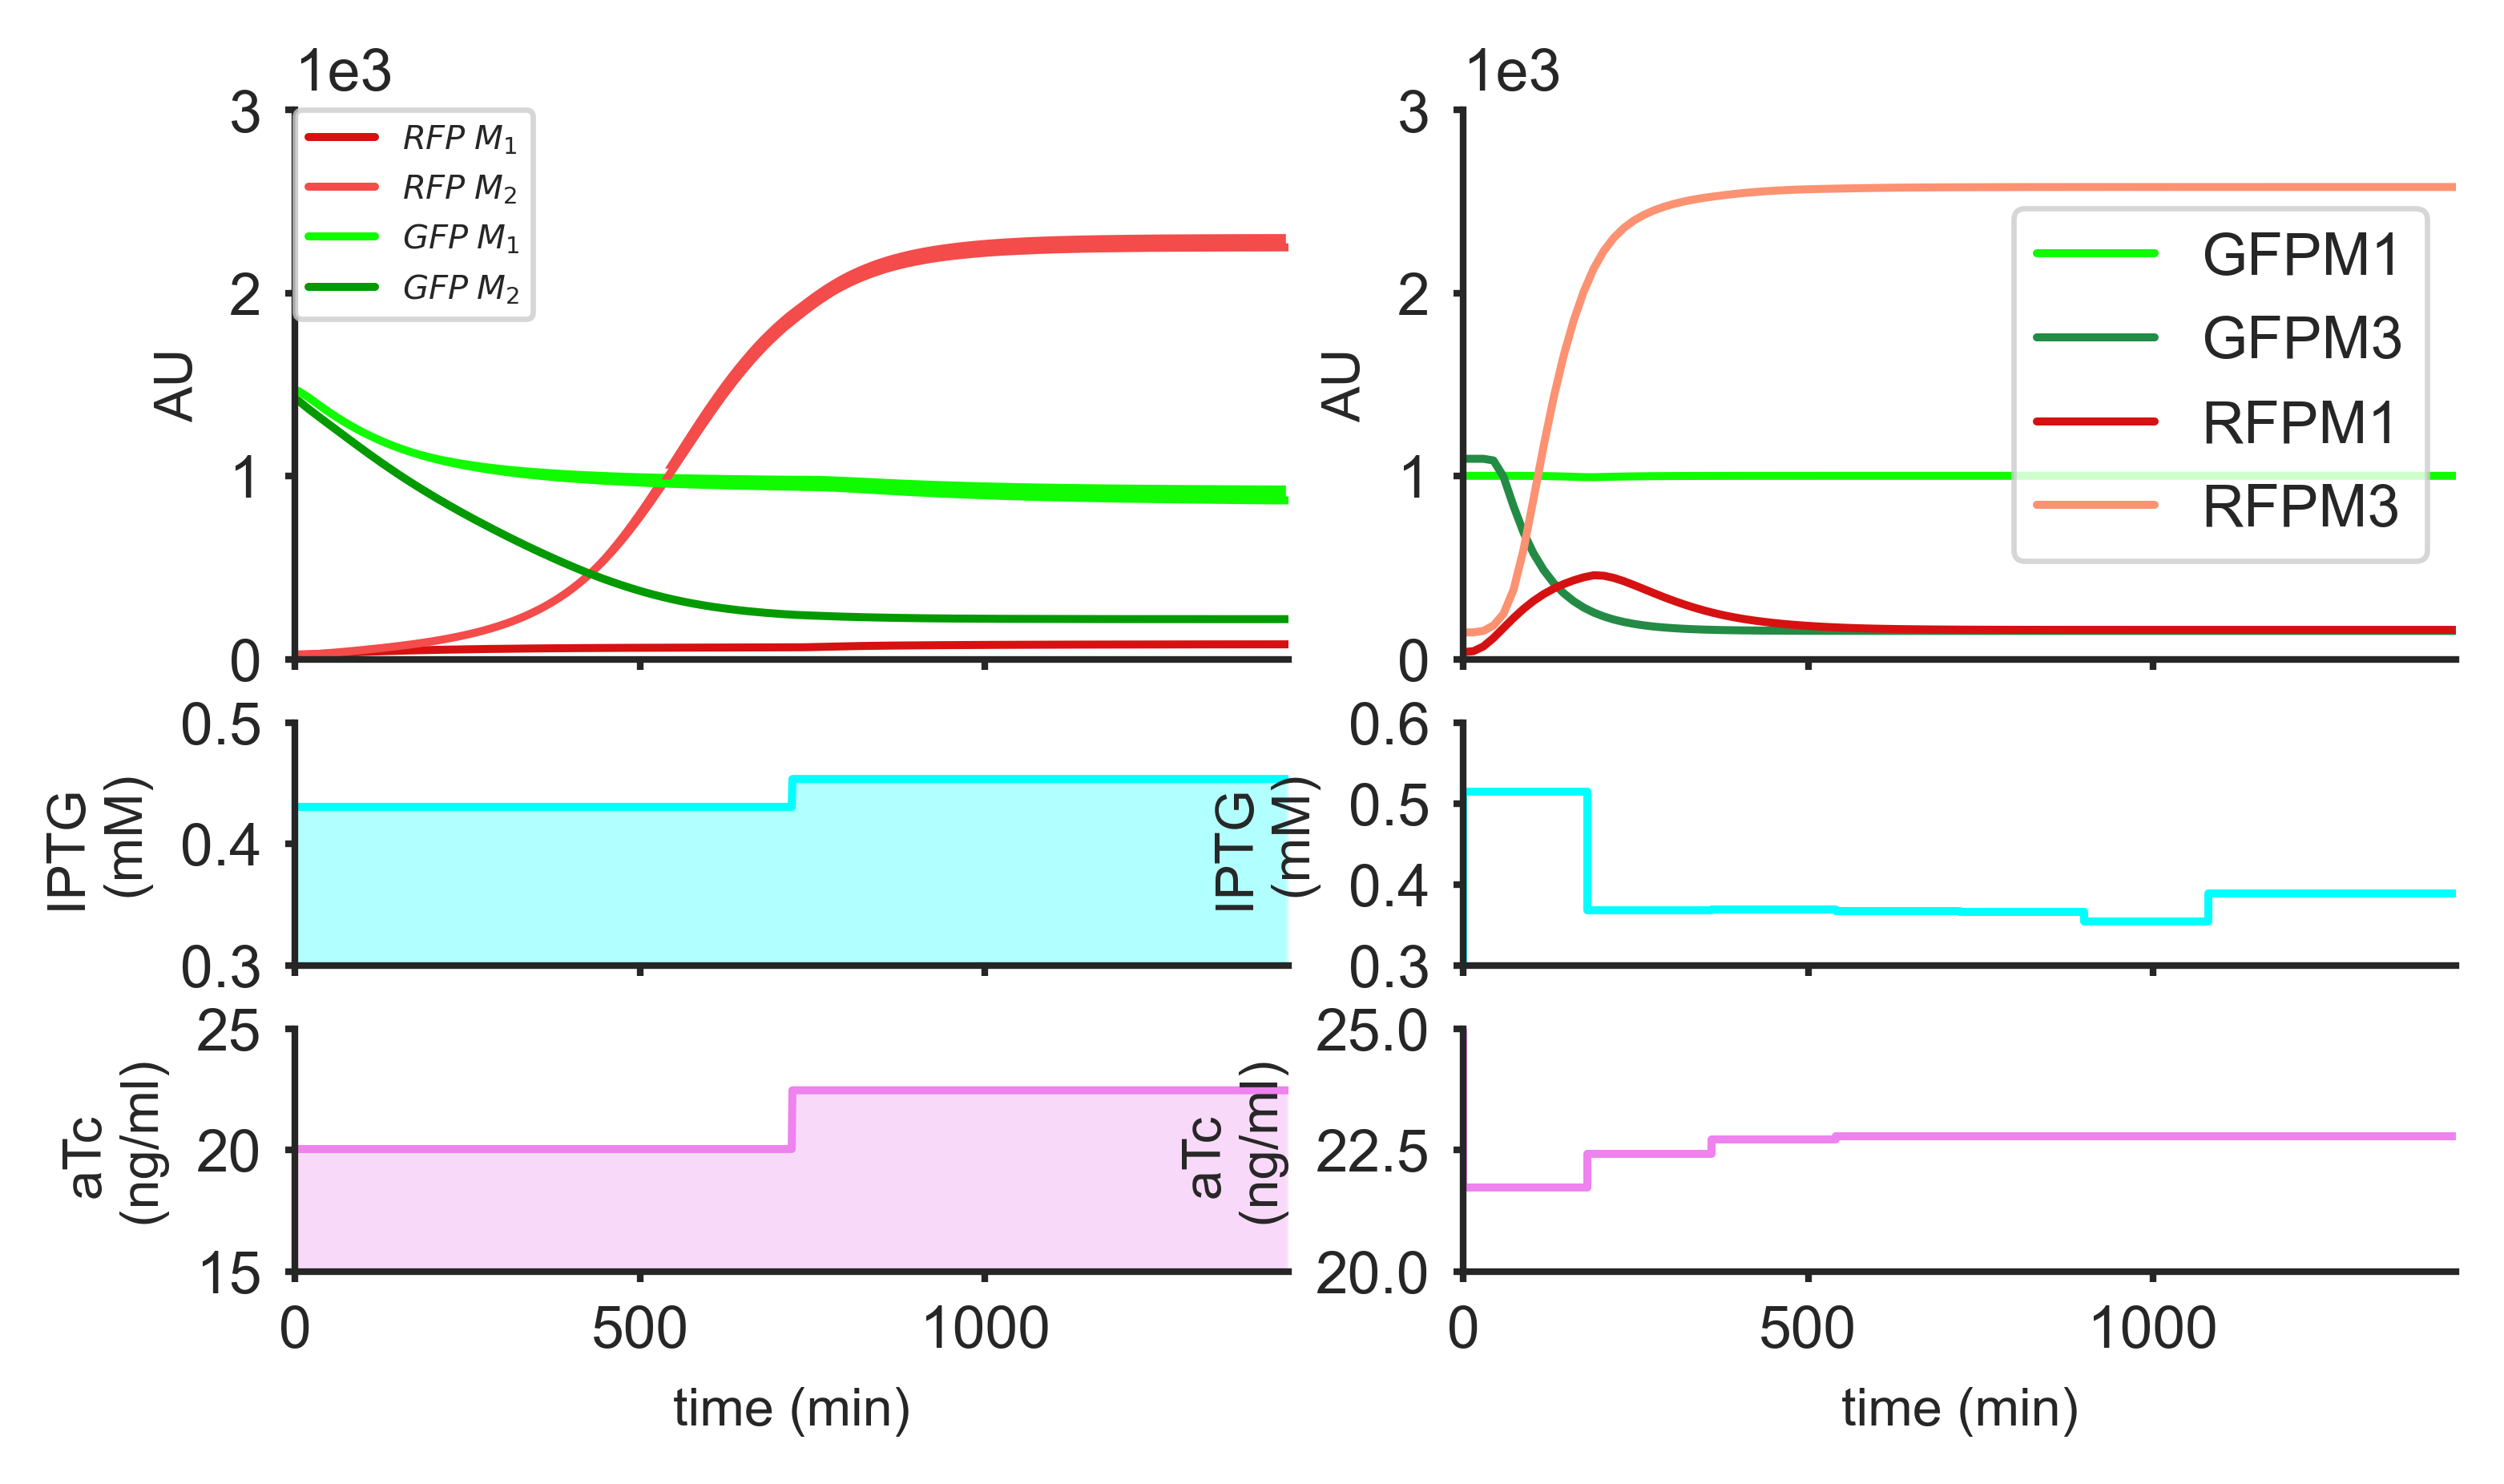

In [8]:

fig = plt.figure(figsize=(5.8, 3.2), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  


gs = gridspec.GridSpec(8,8,wspace = 1.5, hspace = 0.7)

#------> OED Bayesian best
ax1 = plt.subplot(gs[0:4, 0:4]) # Bayesian


ax1.fill_between(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'], Pred_NoOpt_RFP['97.5CI'],facecolor='#f44b4b')
ax1.fill_between(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'], PredM2_NoOpt_RFP['97.5CI'],facecolor='#d61111')

ax1.plot(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'],color='#d61111', label = '$RFP \; M_{1}$')
ax1.plot(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'],color='#f44b4b', label = '$RFP \; M_{2}$')
ax1.fill_between(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'], Pred_NoOpt_GFP['97.5CI'],facecolor='#039a00')
ax1.fill_between(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'], PredM2_NoOpt_GFP['97.5CI'],facecolor='#10fb00')
ax1.plot(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'],color='#10fb00', label = '$GFP \; M_{1}$')
ax1.plot(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'],color='#039a00', label = '$GFP \; M_{2}$')

ax1.tick_params(length=1.5)
ax1.set_ylabel('AU')
ax1.set_xlabel('')
ax1.set_xticklabels('')
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('')
ax1.legend(loc=2, borderaxespad=0., prop={'size': 5})
ax1.tick_params(length=1.5)
ax1.spines['right'].set_visible(False)
ax1.set_xlim([0,1440])
ax1.set_ylim((0, 3000))

ax2 = plt.subplot(gs[4:6, 0:4]) # Bayesian - input IPTG
ax2.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['IPTG'],facecolor='cyan',alpha = 0.3)
ax2.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['IPTG'],'cyan')
#ax2.set_xlabel('time (min)')
ax2.set_xticklabels('')
ax2.set_ylabel('IPTG \n (mM)')
ax2.set_xlim([0,1440])
ax2.tick_params(length=1.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim((0.3,0.5))



ax3 = plt.subplot(gs[6::, 0:4]) # Bayesian - input aTc
ax3.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['aTc'],facecolor='violet',alpha = 0.3)
ax3.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['aTc'],'violet')
ax3.set_xlabel('time (min)')
ax3.set_ylabel('aTc \n (ng/ml)')
ax3.tick_params(length=1.5)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylim((15,25))
ax3.set_xlim([0,1440])


#------> OED Frequentist best
ax4 = plt.subplot(gs[0:4, 4:8]) # Frequentist
ax4.plot(Freq_Output['time'],Freq_Output['GFPm1'],label = 'GFPM1',color = '#10fb00')
ax4.plot(Freq_Output['time'],Freq_Output['GFPm3'],label = 'GFPM3',color = '#238b45')
ax4.plot(Freq_Output['time'],Freq_Output['RFPm1'],label = 'RFPM1',color = '#d61111')
ax4.plot(Freq_Output['time'],Freq_Output['RFPm3'],label = 'RFPM3',color = '#fc9272')
ax4.legend()
ax4.tick_params(length=1.5)
ax4.set_ylabel('AU')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlabel('')
ax4.set_xticklabels('')
ax4.set_xlim([0,1440])
ax4.set_ylim((0, 3000))

ax5 = plt.subplot(gs[4:6, 4:8]) # Frequentist - input IPTG

I = np.array(Freq_Input['IPTG'])
I_up = np.append(I,I[-1])
#ax5.fill_between([0,180,  360,  540,  720,  900, 1080, 1260, 1440],I_up, y2 = 0,facecolor='cyan',alpha = 0.3)
ax5.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),I_up,'cyan')
ax5.set_xlim([0,1440])
ax5.set_xticklabels('')
ax5.set_ylabel('IPTG \n (mM)')
ax5.tick_params(length=1.5)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_ylim((0.3, 0.6))


ax6 = plt.subplot(gs[6::, 4:8]) # Frequentis - input aTc
A = np.array(Freq_Input['aTc'])
A_up = np.append(A,A[-1])

ax6.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),A_up,'violet')
ax6.set_xlim([0,1440])
ax6.set_ylabel('aTc \n (ng/ml)')
ax6.tick_params(length=1.5)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_xlabel('time (min)')
ax6.set_ylim((20, 25))

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.show()
#fig.savefig('/Users/lucia/Dropbox/Processes_V2.0_Images/InkscapeImages/Figure5.svg')

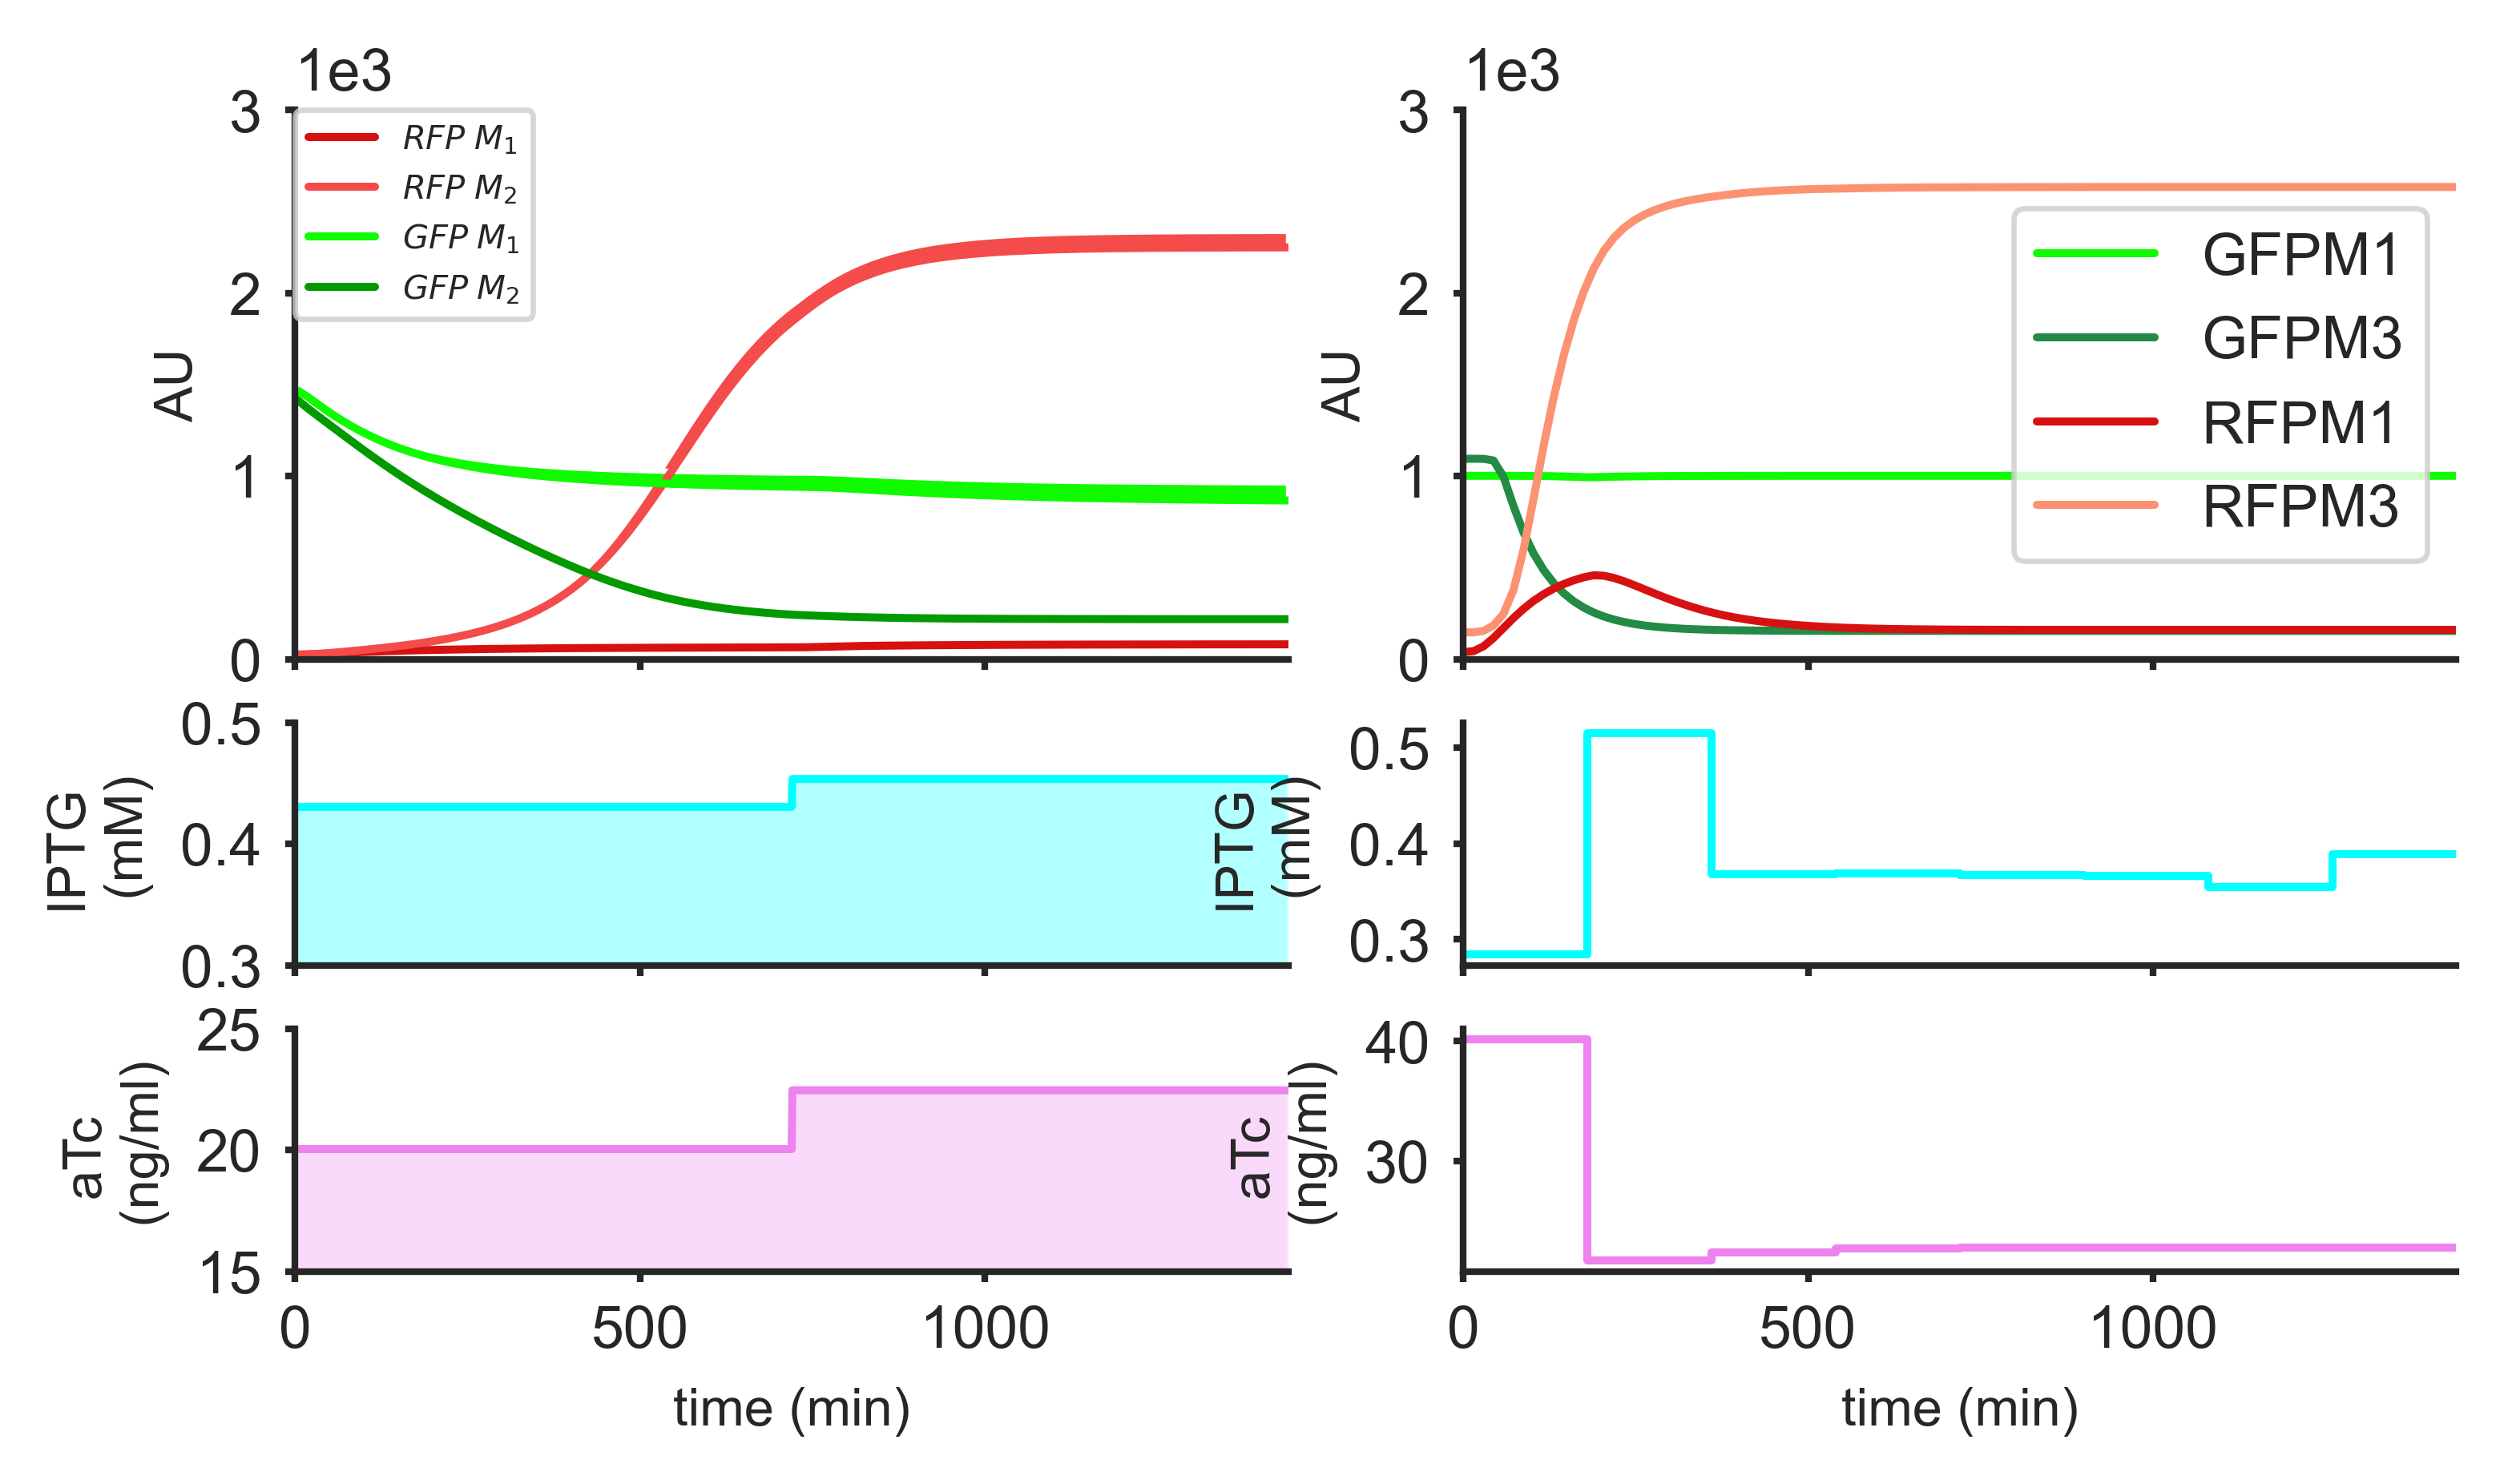

In [22]:
fig = plt.figure(figsize=(5.8, 3.2), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  


gs = gridspec.GridSpec(8,8,wspace = 1.5, hspace = 0.7)

#------> OED Bayesian best
ax1 = plt.subplot(gs[0:4, 0:4]) # Bayesian


ax1.fill_between(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'], Pred_NoOpt_RFP['97.5CI'],facecolor='#f44b4b')
ax1.fill_between(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'], PredM2_NoOpt_RFP['97.5CI'],facecolor='#d61111')

ax1.plot(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'],color='#d61111', label = '$RFP \; M_{1}$')
ax1.plot(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'],color='#f44b4b', label = '$RFP \; M_{2}$')
ax1.fill_between(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'], Pred_NoOpt_GFP['97.5CI'],facecolor='#039a00')
ax1.fill_between(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'], PredM2_NoOpt_GFP['97.5CI'],facecolor='#10fb00')
ax1.plot(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'],color='#10fb00', label = '$GFP \; M_{1}$')
ax1.plot(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'],color='#039a00', label = '$GFP \; M_{2}$')

ax1.tick_params(length=1.5)
ax1.set_ylabel('AU')
ax1.set_xlabel('')
ax1.set_xticklabels('')
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('')
ax1.legend(loc=2, borderaxespad=0., prop={'size': 5})
ax1.tick_params(length=1.5)
ax1.spines['right'].set_visible(False)
ax1.set_xlim([0,1440])
ax1.set_ylim((0, 3000))

ax2 = plt.subplot(gs[4:6, 0:4]) # Bayesian - input IPTG
ax2.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['IPTG'],facecolor='cyan',alpha = 0.3)
ax2.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['IPTG'],'cyan')
#ax2.set_xlabel('time (min)')
ax2.set_xticklabels('')
ax2.set_ylabel('IPTG \n (mM)')
ax2.set_xlim([0,1440])
ax2.tick_params(length=1.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim((0.3,0.5))



ax3 = plt.subplot(gs[6::, 0:4]) # Bayesian - input aTc
ax3.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['aTc'],facecolor='violet',alpha = 0.3)
ax3.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['aTc'],'violet')
ax3.set_xlabel('time (min)')
ax3.set_ylabel('aTc \n (ng/ml)')
ax3.tick_params(length=1.5)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylim((15,25))
ax3.set_xlim([0,1440])


#------> OED Frequentist best
ax4 = plt.subplot(gs[0:4, 4:8]) # Frequentist
ax4.plot(Freq_Output['time'],Freq_Output['GFPm1'],label = 'GFPM1',color = '#10fb00')
ax4.plot(Freq_Output['time'],Freq_Output['GFPm3'],label = 'GFPM3',color = '#238b45')
ax4.plot(Freq_Output['time'],Freq_Output['RFPm1'],label = 'RFPM1',color = '#d61111')
ax4.plot(Freq_Output['time'],Freq_Output['RFPm3'],label = 'RFPM3',color = '#fc9272')
ax4.legend()
ax4.tick_params(length=1.5)
ax4.set_ylabel('AU')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlabel('')
ax4.set_xticklabels('')
ax4.set_xlim([0,1440])
ax4.set_ylim((0, 3000))

ax5 = plt.subplot(gs[4:6, 4:8]) # Frequentist - input IPTG

I = np.array(Freq_Input['IPTG'])
I_up = np.append(I,I[-1])

#ax5.fill_between([0,180,  360,  540,  720,  900, 1080, 1260, 1440],I_up, y2 = 0,facecolor='cyan',alpha = 0.3)
ax5.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),I_up,'cyan',where = 'post')
#ax5.step(np.array(Freq_Input['timeSwitch']),I,'cyan')
ax5.set_xlim([0,1440])
ax5.set_xticklabels('')
ax5.set_ylabel('IPTG \n (mM)')
ax5.tick_params(length=1.5)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
#ax5.set_ylim((0.3, 0.6))


ax6 = plt.subplot(gs[6::, 4:8]) # Frequentis - input aTc
A = np.array(Freq_Input['aTc'])
A_up = np.append(A,A[-1])

#ax6.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),A_up,'violet')
ax6.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),A_up,'violet',where = 'post')
ax6.set_xlim([0,1440])
ax6.set_ylabel('aTc \n (ng/ml)')
ax6.tick_params(length=1.5)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_xlabel('time (min)')
#ax6.set_ylim((20, 25))

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


#plt.show()
fig.savefig('/Users/lucia/Dropbox/Processes_V2.0_Images/InkscapeImages/Figure5_corrected.svg')

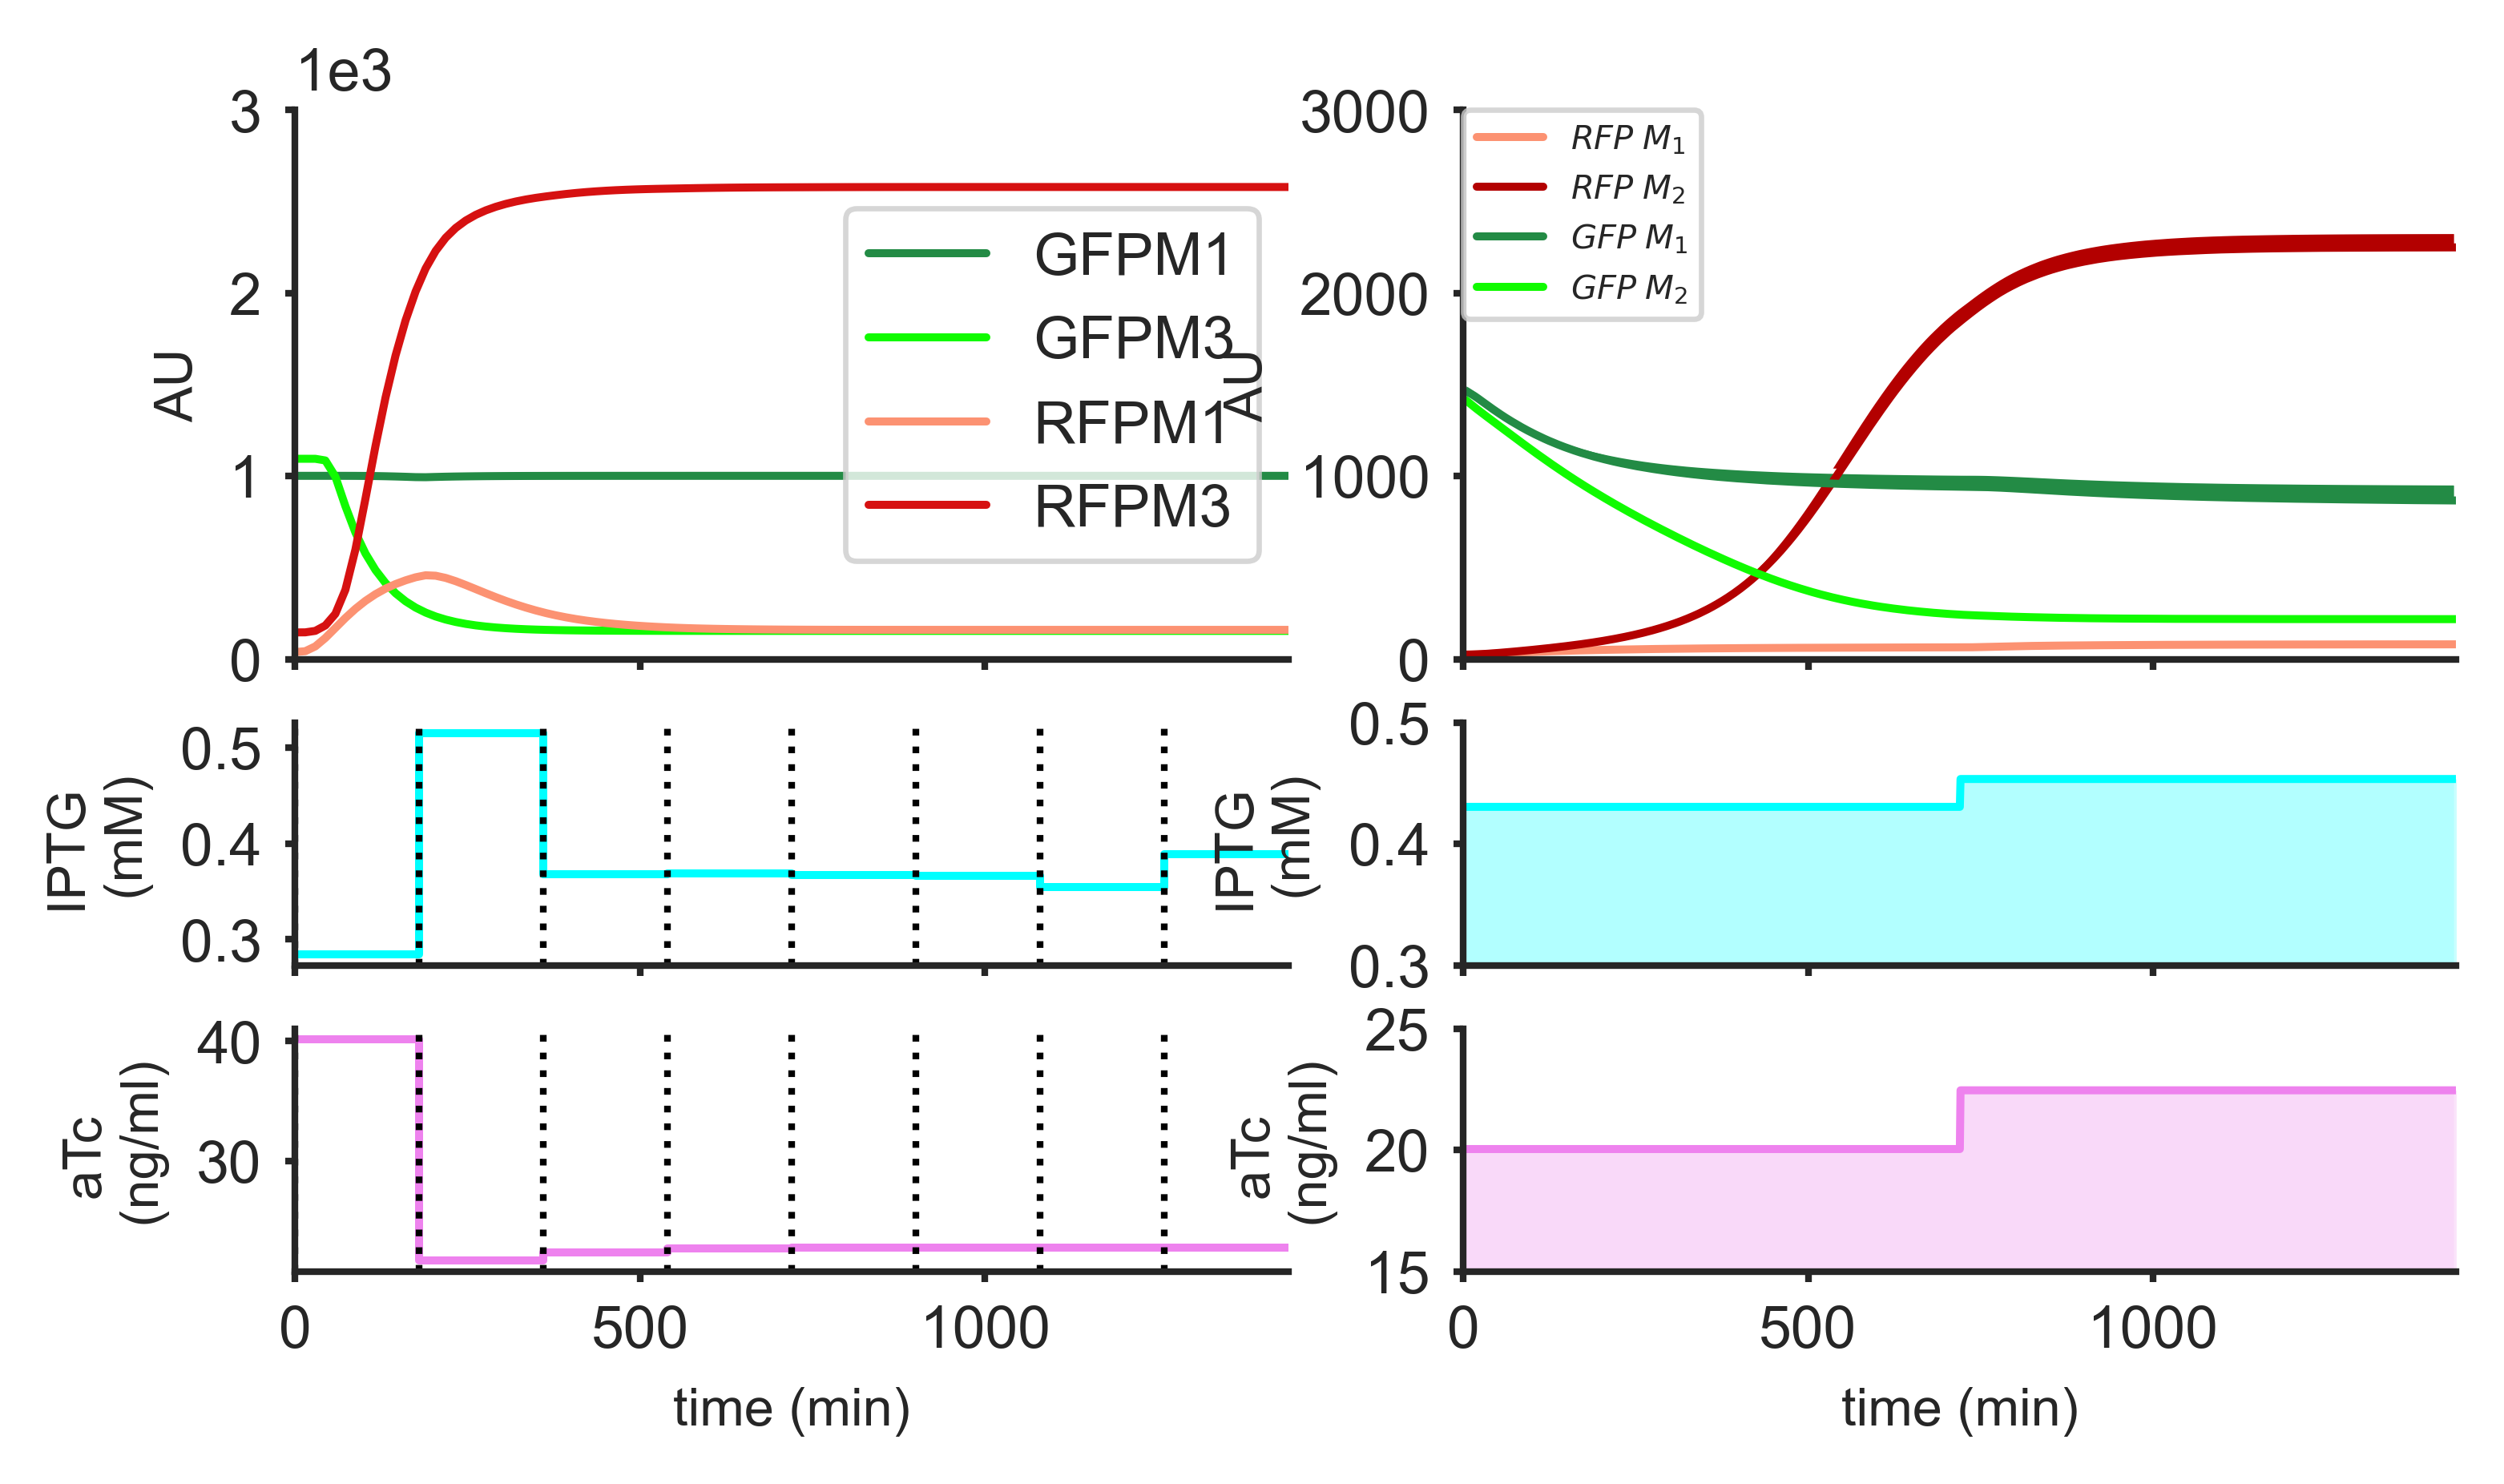

In [21]:
fig = plt.figure(figsize=(5.8, 3.2), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  


gs = gridspec.GridSpec(8,8,wspace = 1.5, hspace = 0.7)
#------> OED Frequentist best
ax4 = plt.subplot(gs[0:4, 0:4]) # Frequentist
ax4.plot(Freq_Output['time'],Freq_Output['GFPm1'],label = 'GFPM1',color = '#238b45')
ax4.plot(Freq_Output['time'],Freq_Output['GFPm3'],label = 'GFPM3',color = '#10fb00')
ax4.plot(Freq_Output['time'],Freq_Output['RFPm1'],label = 'RFPM1',color = '#fc9272')
ax4.plot(Freq_Output['time'],Freq_Output['RFPm3'],label = 'RFPM3',color = '#d61111')
ax4.legend()
ax4.tick_params(length=1.5)
ax4.set_ylabel('AU')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlabel('')
ax4.set_xticklabels('')
ax4.set_xlim([0,1440])
ax4.set_ylim((0, 3000))

ax5 = plt.subplot(gs[4:6, 0:4]) # Frequentist - input IPTG

I = np.array(Freq_Input['IPTG'])
I_up = np.append(I,I[-1])

#ax5.fill_between([0,180,  360,  540,  720,  900, 1080, 1260, 1440],I_up, y2 = 0,facecolor='cyan',alpha = 0.3)
ax5.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),I_up,'cyan',where = 'post')
#ax5.step(np.array(Freq_Input['timeSwitch']),I,'cyan')
for xc in np.array(Freq_Input['timeSwitch']):
    ax5.axvline(x=xc,linestyle = 'dotted',color = 'black',linewidth = 1)
ax5.set_xlim([0,1440])
ax5.set_xticklabels('')
ax5.set_ylabel('IPTG \n (mM)')
ax5.tick_params(length=1.5)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
#ax5.set_ylim((0.3, 0.6))


ax6 = plt.subplot(gs[6::, 0:4]) # Frequentis - input aTc
A = np.array(Freq_Input['aTc'])
A_up = np.append(A,A[-1])

#ax6.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),A_up,'violet')
ax6.step(np.append(np.array(Freq_Input['timeSwitch']),[1440]),A_up,'violet',where = 'post')
ax6.set_xlim([0,1440])
for xc in np.array(Freq_Input['timeSwitch']):
    ax6.axvline(x=xc,linestyle = 'dotted',color = 'black',linewidth = 1)
ax6.set_ylabel('aTc \n (ng/ml)')
ax6.tick_params(length=1.5)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_xlabel('time (min)')
#ax6.set_ylim((20, 25))

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#------> OED Bayesian best
ax1 = plt.subplot(gs[0:4, 4:8]) # Bayesian


ax1.fill_between(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'], Pred_NoOpt_RFP['97.5CI'],facecolor='#b30000')
ax1.fill_between(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'], PredM2_NoOpt_RFP['97.5CI'],facecolor='#fc9272')
ax1.plot(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'],color='#fc9272', label = '$RFP \; M_{1}$')
ax1.plot(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'],color='#b30000', label = '$RFP \; M_{2}$')

ax1.fill_between(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'], Pred_NoOpt_GFP['97.5CI'],facecolor='#10fb00')
ax1.fill_between(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'], PredM2_NoOpt_GFP['97.5CI'],facecolor='#238b45')
ax1.plot(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'],color='#238b45', label = '$GFP \; M_{1}$')
ax1.plot(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'],color='#10fb00', label = '$GFP \; M_{2}$')

ax1.tick_params(length=1.5)
ax1.set_ylabel('AU')
ax1.set_xlabel('')
ax1.set_xticklabels('')
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('')
ax1.legend(loc=2, borderaxespad=0., prop={'size': 5})
ax1.tick_params(length=1.5)
ax1.spines['right'].set_visible(False)
ax1.set_xlim([0,1440])
ax1.set_ylim((0, 3000))

ax2 = plt.subplot(gs[4:6, 4:8]) # Bayesian - input IPTG
ax2.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['IPTG'],facecolor='cyan',alpha = 0.3)
ax2.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['IPTG'],'cyan')
#ax2.set_xlabel('time (min)')
ax2.set_xticklabels('')
ax2.set_ylabel('IPTG \n (mM)')
ax2.set_xlim([0,1440])
ax2.tick_params(length=1.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim((0.3,0.5))



ax3 = plt.subplot(gs[6::, 4:8]) # Bayesian - input aTc
ax3.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['aTc'],facecolor='violet',alpha = 0.3)
ax3.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['aTc'],'violet')
ax3.set_xlabel('time (min)')
ax3.set_ylabel('aTc \n (ng/ml)')
ax3.tick_params(length=1.5)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylim((15,25))
ax3.set_xlim([0,1440])


plt.show()
fig.savefig('/Users/lucia/Dropbox/Processes_V2.0_Images/InkscapeImages/Figure5_colors.svg')